In [79]:
from util import util
from dataloader.original import get_dataset
from torch.utils.data import DataLoader
import torch
from architecture import pipe
from torchvision.transforms.v2 import functional as F

In [80]:
parser = util.LabelParser()

In [81]:
testing_dataset = get_dataset('test', augmentation=False)

In [82]:
vision_model = pipe.get_model().to('cpu')

In [87]:
state = torch.load('./saves/exp_3/model_epoch_10.pth')
vision_model.load_state_dict(state['model_state_dict'])
del state

In [88]:
vision_model = vision_model.eval()

In [89]:
dataset = DataLoader(testing_dataset, shuffle=True)

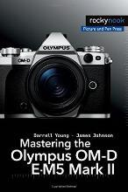

In [104]:
sample = next(iter(dataset))
F.to_pil_image(sample[0][0])

In [105]:
print(sample[1])
print(parser.to_classes(sample[1]))

tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
('Computing', 1.0)


In [108]:
res = vision_model(sample[0]).softmax(dim=-1)
parser.pick_top(res[0], 5, prettify=True)

(['Crime-Thriller',
  'Science-Fiction-Fantasy-Horror',
  'Sport',
  'Romance',
  'History-Archaeology'],
 [0.1264709085226059,
  0.07925162464380264,
  0.06781315803527832,
  0.06092444062232971,
  0.059441711753606796])